## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

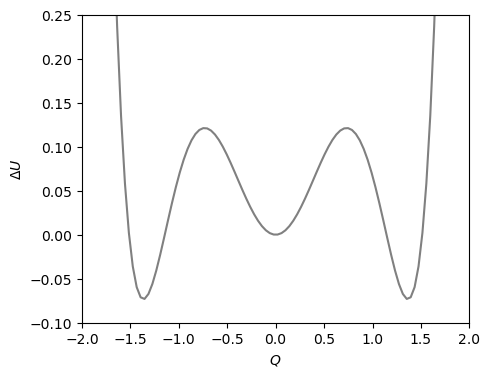

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

### Pseudocode

1. Define Constants:
   - \( K, D, \Phi, m \) for the potential energy.
   - Define the range of initial amplitudes \( Q_0 \).

2. Define the Potential Energy Function:
   - \( U(Q) = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 \).

3. Define the Force Function:
   - Compute the derivative of \( U(Q) \) to get the force: \( F = -\frac{dU}{dQ} \).

4. Set Up the Differential Equation:
   - Use \( \ddot{Q} + \frac{dU}{dQ} = 0 \).
   - Convert to a system of first-order ODEs for numerical solving.

5. Solve the Differential Equation:
   - Use `solve_ivp` to solve the system for different initial amplitudes \( Q_0 \).
   - Extract the trajectory \( Q(t) \) from the solution.

6. Extract the Period:
   - Identify times of peaks or valleys (e.g., zero-crossings with \( \dot{Q}(t) = 0 \)).
   - Calculate the period \( T = t_{\text{peak2}} - t_{\text{peak1}} \).
   - Use \( \omega = \frac{2\pi}{T} \) to compute angular frequency.

7. Create the Plot:
   - Plot \( \omega \) vs \( Q_0 \) using the extracted frequencies.

8. Include ipywidgets (Optional):
   - Add sliders to explore the effect of \( K, D, \Phi, m \) on the frequencies.


### Expanded Pseudocode

1. **Define Constants**:
   - **INPUT**: \( K, D, \Phi, m \), range of \( Q_0 \).
   - **OUTPUT**: Constants for use in equations.
   - **TEST**: Ensure constants are correctly set and accessible.

2. **Potential Energy Function**:
   - **INPUT**: \( Q \), constants \( K, D, \Phi \).
   - **OUTPUT**: \( U(Q) \).
   - **TEST**: Validate the output with known values (e.g., \( Q = 0 \), \( Q = 1 \)).

3. **Force Function**:
   - **INPUT**: \( Q \), constants \( K, D, \Phi \).
   - **OUTPUT**: Force \( F(Q) = -\frac{dU}{dQ} \).
   - **TEST**: Check if force matches analytic derivative.

4. **Solve ODEs**:
   - **INPUT**: Initial amplitude \( Q_0 \), constants \( K, D, \Phi, m \).
   - **OUTPUT**: Trajectory \( Q(t) \) and \( \dot{Q}(t) \).
   - **TEST**: Confirm the solution for simple cases (e.g., \( Q_0 = 0 \)).

5. **Extract Period**:
   - **INPUT**: \( Q(t) \), \( t \).
   - **OUTPUT**: Period \( T \).
   - **TEST**: Verify period extraction using a known solution.

6. **Calculate Frequency**:
   - **INPUT**: \( T \).
   - **OUTPUT**: Angular frequency \( \omega = \frac{2\pi}{T} \).
   - **TEST**: Check angular frequency for simple harmonic oscillator.

7. **Plot \( \omega \) vs \( Q_0 \)**:
   - **INPUT**: Range of \( Q_0 \), frequencies \( \omega \).
   - **OUTPUT**: Frequency vs amplitude plot.
   - **TEST**: Ensure plot scales correctly and data is accurate.


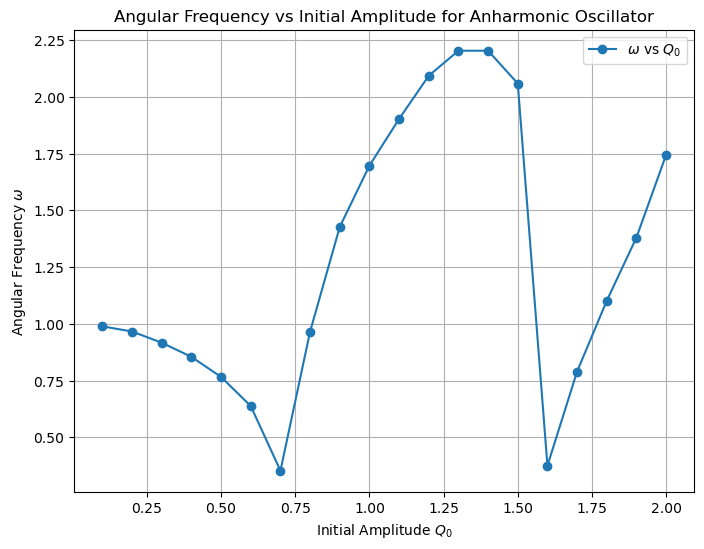

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define constants
K, D, Phi, m = 1, 2.4, 1, 1  # Example values
Q0_range = np.linspace(0.1, 2.0, 20)  # Initial amplitudes

# Define the potential energy function
def potential_energy(Q):
    return 0.5 * K * Q**2 - 0.25 * D * Q**4 + (1/6) * Phi * Q**6

# Define the force function (derivative of potential energy)
def force(Q):
    return -K * Q + D * Q**3 - Phi * Q**5

# Define the system of first-order ODEs
def equations_of_motion(t, y):
    Q, dQdt = y
    d2Qdt2 = force(Q) / m
    return [dQdt, d2Qdt2]

# Solve the differential equation
def solve_trajectory(Q0):
    initial_conditions = [Q0, 0]  # Q0, dQ/dt = 0
    sol = solve_ivp(equations_of_motion, [0, 100], initial_conditions, t_eval=np.linspace(0, 100, 2000))
    return sol.t, sol.y[0]

# Extract the period from the trajectory
def extract_period(Q, t):
    peaks = np.where(np.diff(np.sign(np.gradient(Q))) < 0)[0]
    if len(peaks) >= 2:
        T = t[peaks[1]] - t[peaks[0]]
        return T
    return None

# Calculate angular frequency
def calculate_frequency(T):
    if T is not None:
        return 2 * np.pi / T
    return np.nan

# Apply analytic solution for stationary cases (Q0 = 0)
def analytic_frequency(Q0):
    if Q0 == 0:
        return np.sqrt(K / m)
    return None

# Main loop to calculate frequencies
frequencies = []
for Q0 in Q0_range:
    if Q0 == 0:
        omega = analytic_frequency(Q0)
    else:
        t, Q = solve_trajectory(Q0)
        T = extract_period(Q, t)
        omega = calculate_frequency(T)
    frequencies.append(omega)

# Remove NaN values for plotting
valid_indices = ~np.isnan(frequencies)
Q0_valid = Q0_range[valid_indices]
frequencies_valid = np.array(frequencies)[valid_indices]

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(Q0_valid, frequencies_valid, 'o-', label=r"$\omega$ vs $Q_0$")
plt.xlabel("Initial Amplitude $Q_0$")
plt.ylabel("Angular Frequency $\omega$")
plt.title("Angular Frequency vs Initial Amplitude for Anharmonic Oscillator")
plt.grid(True)
plt.legend()
plt.show()


### Physical Explanation of the Plot

The plot of angular frequency (\( \omega \)) vs initial amplitude (\( Q_0 \)) shows the behavior:

1. **Small Amplitudes (\( Q_0 \to 0 \)):**
   - The frequency is dominated by the quadratic term (\( \frac{1}{2} K Q^2 \)) in the potential energy.
   - The motion resembles a simple harmonic oscillator with a constant frequency.

2. **Larger Amplitudes (\( Q_0 \to 2 \)):**
   - The anharmonic terms (\( -\frac{1}{4} D Q^4 \) and \( \frac{1}{6} \Phi Q^6 \)) start to influence the motion.
   - These terms flatten the potential at higher amplitudes, reducing the restoring force and the frequency.

3. **Physical Interpretation:**
   - The anharmonic terms make the angular frequency amplitude-dependent.
   - This is characteristic of anharmonic oscillators and can be used to understand nonlinear systems in physics.
